In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [13]:
#Using the path function from the pathlib library to read the excel files
#Loading the operating budget data into dataframes
budget_path_2019 = Path("Resources/approved-operating-budget-summary-2019.xlsx") #2019
budget2019_df = pd.read_excel(budget_path_2019, sheet_name='Open Data')
budget_path_2020 = Path("Resources/approved-operating-budget-summary-2020.xlsx") #2020
budget2020_df = pd.read_excel(budget_path_2020, sheet_name='Open Data')
budget_path_2021 = Path("Resources/approved-operating-budget-summary-2021.xlsx") #2021
budget2021_df = pd.read_excel(budget_path_2021, sheet_name='Open Data')
budget_path_2022 = Path("Resources/approved-operating-budget-summary-2022.xlsx") #2022
budget2022_df = pd.read_excel(budget_path_2022, sheet_name='Open Data')
budget_path_2023 = Path("Resources/approved-operating-budget-summary-2023.xlsx") #2023
budget2023_df = pd.read_excel(budget_path_2023, sheet_name='Open Data')
df_list = [budget2019_df,budget2020_df,budget2021_df,budget2022_df,budget2023_df]

In [14]:
for i, df in enumerate(df_list): #Renaming the last column using a loop
    year = 2019 + i
    new_column_name = f'Budgeted amount {year}'
    df.rename(columns={year: new_column_name}, inplace=True)

In [15]:
#Filtering data only for the expenses
budget2019_df_exp = budget2019_df[budget2019_df['Expense/Revenue']=='Expenses']
budget2020_df_exp = budget2020_df[budget2020_df['Expense/Revenue']=='Expenses']
budget2021_df_exp = budget2021_df[budget2021_df['Expense/Revenue']=='Expenses']
budget2022_df_exp = budget2022_df[budget2022_df['Expense/Revenue']=='Expenses']
budget2023_df_exp = budget2023_df[budget2023_df['Expense/Revenue']=='Expenses']

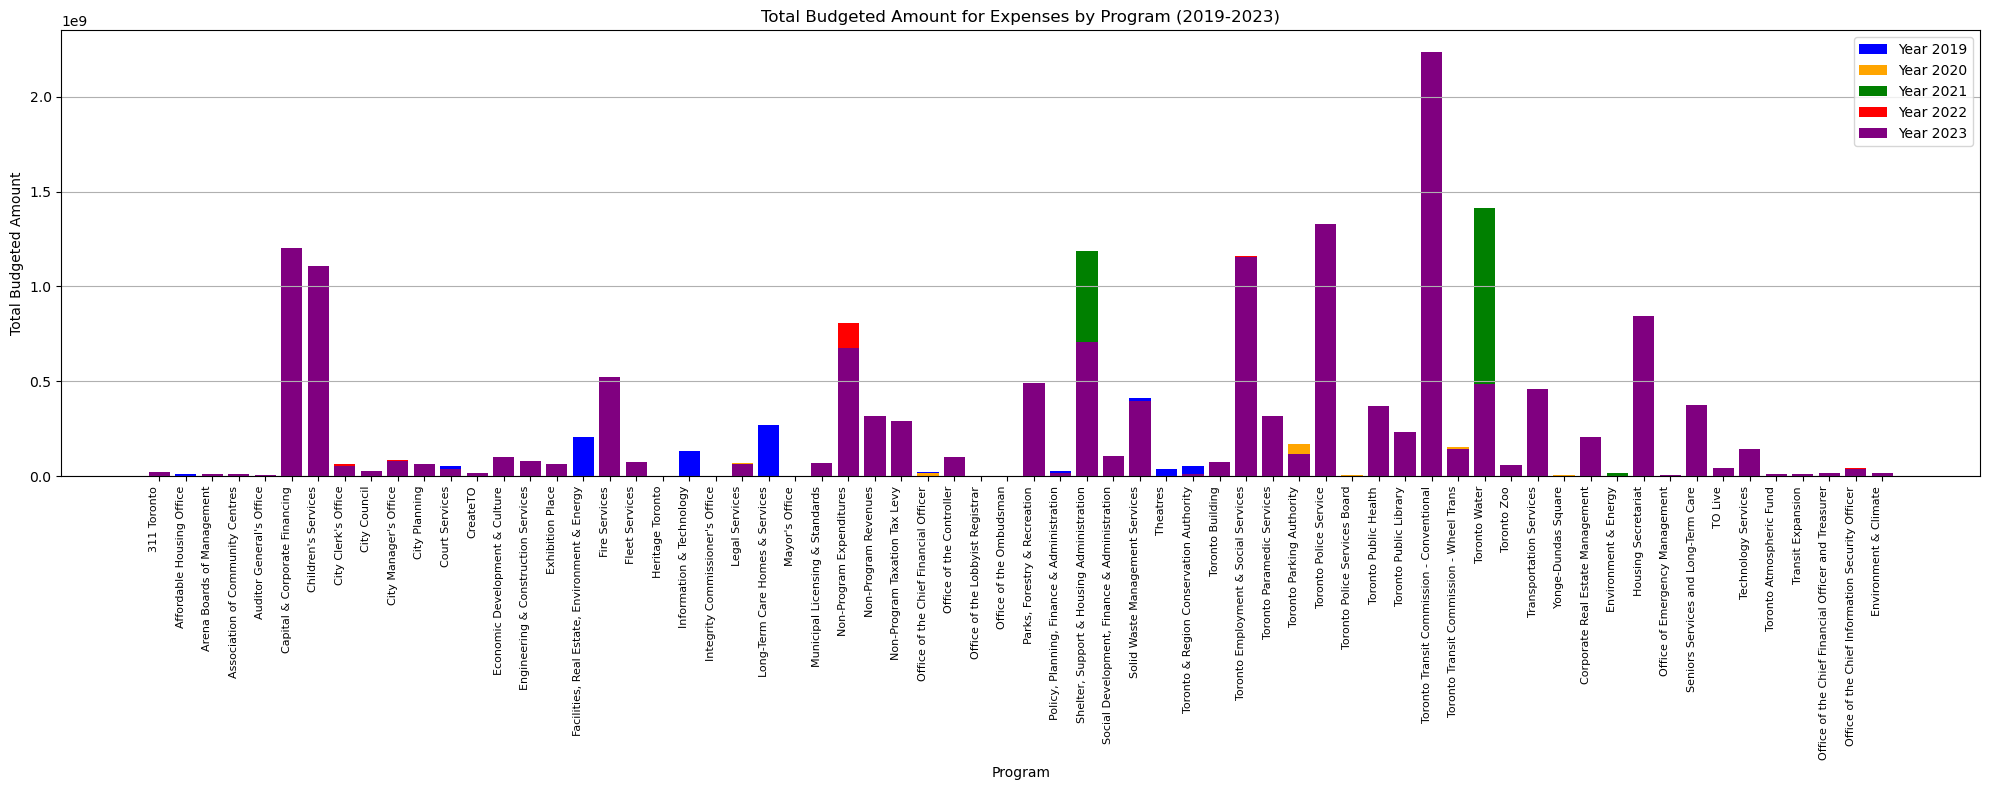

In [16]:
# Plot budget comparison for all five years (2019, 2020, 2021, 2022, 2023) Expenses
plt.figure(figsize=(20, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple']
sum_by_program_list = [] #Empty list to store the sum for each program
# List of DataFrames for each year
df_exp_list = [budget2019_df_exp, budget2020_df_exp, budget2021_df_exp, budget2022_df_exp, budget2023_df_exp]
# Iterate over years
for i, df_exp in enumerate(df_exp_list):
    year = 2019 + i
    # Group by 'Program' and sum the 'Budgeted amount' for each year
    sums_by_program = df_exp.groupby('Program')[f'Budgeted amount {year}'].sum().reset_index()
    #Adding the sums to the empty list
    sum_by_program_list.append(sums_by_program)
    # Plotting a bar chart for each year with custom color
    plt.bar(sums_by_program['Program'], sums_by_program[f'Budgeted amount {year}'], label=f'Year {year}', color=colors[i])
# Customize plot
plt.title('Total Budgeted Amount for Expenses by Program (2019-2023)')
plt.xlabel('Program')
plt.ylabel('Total Budgeted Amount')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("output/Total Budgeted Amount for expenses by program.png") #Saving the image
plt.show()

In [17]:
#Aggregate expenditure for 2019
sum_by_program_list[0].sort_values('Budgeted amount 2019', ascending=False)

,Program,Budgeted amount 2019
48,Toronto Transit Commission - Conventional,1.910540e+09
50,Toronto Water,1.331390e+09
44,Toronto Police Service,1.172748e+09
41,Toronto Employment & Social Services,1.147583e+09
35,"Shelter, Support & Housing Administration",1.003702e+09
5,Capital & Corporate Financing,9.988244e+08
6,Children's Services,6.573937e+08
26,Non-Program Expenditures,6.181655e+08
17,Fire Services,4.940694e+08
33,"Parks, Forestry & Recreation",4.766251e+08


In [18]:
#Aggregate expenditure for 2020
sum_by_program_list[1].sort_values('Budgeted amount 2020', ascending=False)

,Program,Budgeted amount 2020
51,Toronto Transit Commission - Conventional,1.987171e+09
53,Toronto Water,1.390427e+09
47,Toronto Police Service,1.221216e+09
44,Toronto Employment & Social Services,1.094564e+09
4,Capital & Corporate Financing,1.026797e+09
36,"Shelter, Support & Housing Administration",1.007823e+09
5,Children's Services,6.349402e+08
25,Non-Program Expenditures,5.416959e+08
17,Fire Services,4.973442e+08
33,"Parks, Forestry & Recreation",4.594002e+08


In [19]:
#Aggregate expenditure for 2021
sum_by_program_list[2].sort_values('Budgeted amount 2021', ascending=False)

,Program,Budgeted amount 2021
52,Toronto Transit Commission - Conventional,2.034438e+09
54,Toronto Water,1.415336e+09
48,Toronto Police Service,1.229507e+09
37,"Shelter, Support & Housing Administration",1.185308e+09
45,Toronto Employment & Social Services,1.156356e+09
4,Capital & Corporate Financing,1.101347e+09
5,Children's Services,6.486655e+08
25,Non-Program Expenditures,5.432764e+08
17,Fire Services,5.093871e+08
34,"Parks, Forestry & Recreation",4.552792e+08


In [20]:
#Aggregate expenditure for 2022
sum_by_program_list[3].sort_values('Budgeted amount 2022', ascending=False)

,Program,Budgeted amount 2022
52,Toronto Transit Commission - Conventional,2.096541e+09
48,Toronto Police Service,1.262428e+09
45,Toronto Employment & Social Services,1.157836e+09
4,Capital & Corporate Financing,1.094300e+09
25,Non-Program Expenditures,8.066776e+08
37,"Shelter, Support & Housing Administration",6.782025e+08
5,Children's Services,6.718766e+08
20,Housing Secretariat,6.468627e+08
17,Fire Services,5.234670e+08
34,"Parks, Forestry & Recreation",4.819643e+08


In [21]:
#Aggregate expenditure for 2023
sum_by_program_list[4].sort_values('Budgeted amount 2023', ascending=False)

,Program,Budgeted amount 2023
52,Toronto Transit Commission - Conventional,2.237544e+09
48,Toronto Police Service,1.330626e+09
4,Capital & Corporate Financing,1.204853e+09
45,Toronto Employment & Social Services,1.153610e+09
5,Children's Services,1.108471e+09
20,Housing Secretariat,8.456243e+08
37,"Shelter, Support & Housing Administration",7.079495e+08
25,Non-Program Expenditures,6.730649e+08
17,Fire Services,5.238818e+08
34,"Parks, Forestry & Recreation",4.900465e+08
